
# Data and computations for paper 

Lars G. Johnsen
National Library of Norway

In [7]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
mu.update('collocations')
from collocations import dist_coll_urn, urn_coll, calculate_midpoint, dist
import pandas as pd

Updated file `C:\Users\yoons\Documents\GitHub\newspapers_coll_conc\collocations.py`

In [8]:
def df_jaccard(df, col1, col2, number=100, asc=False):
    s1 = df.sort_values(by=col1, ascending=asc)[:number].index
    s2 = df.sort_values(by=col2, ascending=asc)[:number].index
    
    #print(len(set(s1)&set(s2)))
    
    return jaccard(s1, s2)

In [9]:
def jaccards(s1, s2):
    return len(set(s1)&set(s2)),len(set(s1)|set(s2))

In [10]:
def jaccard(s1, s2):
    return len(set(s1)&set(s2))/len(set(s1)|set(s2))

In [11]:
def make_coll_df(small, large, tot):
    """take two collocations, small and large, and a reference tot. The reference must av a column call tot as well"""
    coll = pd.DataFrame()
    coll['small'] = small['freq']
    coll['large'] = large['freq']
    #coll['ratio'] = coll['small']/coll['large']
    coll['srel'] = coll.small/coll.small.sum()
    coll['lrel'] = coll.large/coll.large.sum()
    coll['ratio'] = coll.srel/coll.lrel
    coll['adjusted'] = coll.small**0.01*coll.ratio
    coll['nb'] = coll.small/tot.tot
    return coll

In [12]:
import pandas as pd

In [13]:
def make_dcoll_df(dists, norm, tot):
    
    return nb.frame(
        {
        'score':(dists.freq/dists.freq.sum())**0.01*abs(norm/dists['2']), 
        'dist':dists['1'],
        'nb':(dists.freq/dists.freq.sum())/tot.tot
        }
    ).transpose()

### Reference corpus

The reference is the total counts from approximately 450 000 books from nb.no

In [14]:
tot = nb.frame(nb.totals(50000), 'tot')

In [15]:
nb.normalize_corpus_dataframe(tot)
tot.head()

,tot
.,0.058921
",",0.051453
og,0.025297
i,0.021425
det,0.012728


# Corpus

The corpus for doing collocations is a sample of 800 books from fictional literature, dewey decimal code 813.

In [20]:
smd = 5
lmd = 10
collword = 'motor'

In [21]:
def filenames(smd = smd, lmd = lmd, collword = collword, corpus_size= 1000, period = (1980, 2000)):
    return {
    'small_right': '_'.join([collword, str(smd), str(corpus_size), '-'.join([str(x) for x in period]), str(0), str(int(2*smd)), '.csv']),
    'large_right': '_'.join([collword, str(smd), str(corpus_size),  '-'.join([str(x) for x in period]), str(0), str(int(2*lmd)), '.csv']),
    'small_left' : '_'.join([collword, str(lmd), str(corpus_size),  '-'.join([str(x) for x in period]), str(int(2*smd)), str(0), '.csv']),
    'large_left' : '_'.join([collword, str(lmd), str(corpus_size),  '-'.join([str(x) for x in period]), str(int(2*lmd)), str(0), '.csv'])
        }

# Store the data subsequent use

In [44]:
names = filenames()
names

{'small_right': 'motor_5_1000_1980-2000_0_10_.csv',
 'large_right': 'motor_5_1000_1980-2000_0_20_.csv',
 'small_left': 'motor_10_1000_1980-2000_10_0_.csv',
 'large_left': 'motor_10_1000_1980-2000_20_0_.csv'}

In [39]:
a1 = pd.read_csv(names['small_right'], index_col=0)
a2 = pd.read_csv(names['large_right'], index_col=0)
b1 = pd.read_csv(names['small_left'], index_col=0)
b2 = pd.read_csv(names['large_left'], index_col=0)


## Create collocation dataframe 

Based on data from a1 and a2, and b1 and b2. The name for the collocations after is `coll` while `collb` is for the collocates coming before.

In [40]:
coll = make_dcoll_df(a1, lmd, tot)

In [41]:
collb = make_dcoll_df(b1, lmd, tot)

## Sorting 

Sorting on the reference is by column 'nb'

In [42]:
coll.sort_values(by='score', ascending=False)[:20][:20].fillna(0).style.background_gradient()

,score,dist,nb
vehicles,6.378172,1.000000,328.531033
vehicle,5.619160,1.000000,187.444018
driver,5.081511,1.416667,8.911719
Ekstrautstyr,4.882400,1.375000,0.000000
2900,4.833930,1.000000,0.000000
1938,4.156638,1.750000,13.794768
bak,3.968344,2.116667,3.204980
klubb,3.655068,1.000000,30.784782
dory,3.655068,1.000000,0.000000
rooms,3.655068,1.000000,79.334524


In [43]:
coll.sort_values(by='nb', ascending=False)[:20].fillna(0).style.background_gradient()

,score,dist,nb
traktor,1.729295,5.439542,576.283711
Br.nr,1.409093,6.666667,471.487779
generator,2.155538,4.286111,464.778594
turtall,1.611344,5.775000,425.446413
tomgang,2.717075,3.222222,369.456693
Motoren,1.903456,4.853968,366.417291
motor,1.442792,6.568114,333.655179
vehicles,6.378172,1.000000,328.531033
motorvogner,1.726843,5.333333,324.951755
motorens,1.212556,7.944444,245.906948


In [28]:
coll.loc[[',','.', 'og','eller', 'i', 'på']]

,score,dist,nb
",",2.062878,4.702353,0.882515
.,2.006852,4.840856,0.924286
og,2.069843,4.652627,0.862897
eller,1.980303,4.761837,1.220065
i,2.021266,4.744752,0.795764
på,1.793086,5.321703,0.932166


# collb

In [29]:
collb.sort_values(by='nb', ascending=False)[:20].fillna(0).style.background_gradient()

,score,dist,nb
primus,8.637566,-1.053763,2072.644541
electric,3.976120,-2.300275,495.218239
motor,1.539727,-6.175441,484.663935
hydraulisk,3.701868,-2.457816,455.162359
pump,1.930422,-4.785669,323.996712
generator,2.318908,-3.964892,320.377115
båtens,5.008283,-1.583333,279.368796
engine,1.396019,-6.685185,267.457166
induction,2.620567,-3.437500,265.079769
diesel,2.380117,-3.822338,230.970588


In [30]:
collb.sort_values(by='score', ascending=False)[:40].fillna(0).style.background_gradient()

,score,dist,nb
primus,8.637566,-1.053763,2072.644541
kald,7.275628,-1.184325,31.380793
firesylindra,6.742373,-1.142857,0.000000
kraftig,6.630272,-1.267361,11.208063
Christines,6.329622,-1.000000,0.000000
Primus,6.112191,-1.000000,0.000000
brølende,6.112191,-1.000000,119.835963
Petunias,5.576387,-1.000000,0.000000
firepolet,5.576387,-1.000000,0.000000
elektrisk,5.536218,-1.694542,162.050499


# coll

# jaccard similarity

compare over a range

In [45]:
rng = range(2,40,2)

# for collb

In [46]:
jaccard_scoresb = nb.frame({'ratio': {x:df_jaccard(collb, 'nb', 'score', x) for x in rng}
                            }).transpose()

Text(0, 0.5, 'Jaccard score')

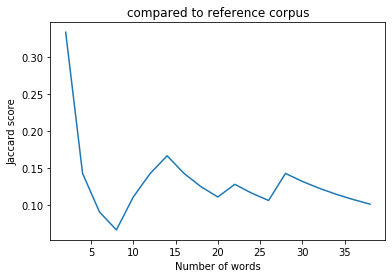

In [47]:
ax = jaccard_scoresb['ratio'].plot(title='compared to reference corpus');
ax.set_xlabel("Number of words")
ax.set_ylabel("Jaccard score")

# for coll

In [48]:
jaccard_scores = nb.frame({'ratio': {x:df_jaccard(coll, 'nb', 'score', x) for x in rng}     }).transpose()

Text(0, 0.5, 'Jaccard score')

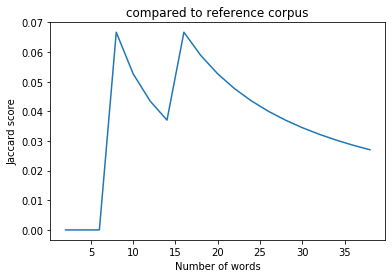

In [49]:
ax = jaccard_scores['ratio'].plot(title='compared to reference corpus');
ax.set_xlabel("Number of words")
ax.set_ylabel("Jaccard score")